### 수용 영역

In [15]:
import numpy as np
import matplotlib.pyplot as plt


In [16]:
# 피처맵 크기
def calculate_feature_map_size(input_size, filter_size, stride):
    return (input_size - filter_size) // stride + 1  # 정수 나눗셈 연산자

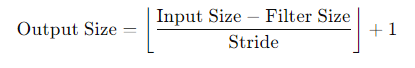

In [17]:
def calculate_receptive_field(layers, strides):
    receptive_field = 1
    for f, s in zip(layers, strides):
        receptive_field = receptive_field + (f - 1) * s
    return receptive_field

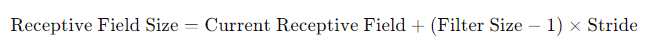

In [18]:
# 수용 영역(Receptive Field) 계산 함수
def calculate_receptive_field(filter_sizes, strides):
    receptive_field = 1
    for f, s in zip(filter_sizes, strides):    #  각 레이어의 필터 크기(f)와 스트라이드 값(s)을 순차적으로 순회
        receptive_field = receptive_field + (f - 1) * s
    return receptive_field


# filter_sizes: 각 레이어의 필터 크기(리스트)
# strides: 각 레이어의 스트라이드(리스트입)
# receptive_field: 초기 수용 영역 크기를 1로 설정


In [24]:
# 필터 크기와 스트라이드 설정 - example
input_size = 32
filter_sizes = [3, 3, 3, 3, 3]
strides = [1, 1, 1, 1, 1]

In [25]:

# 특징 맵 크기 계산
feature_map_sizes = []
current_input_size = input_size
for f, s in zip(filter_sizes, strides):
    current_output_size = calculate_feature_map_size(current_input_size, f, s)
    feature_map_sizes.append(current_output_size)
    current_input_size = current_output_size

# 수용 영역 크기 계산
receptive_fields = calculate_receptive_field(filter_sizes, strides)


In [26]:

# 결과 출력
print("Feature Map Sizes:", feature_map_sizes)
print("Receptive Field Size:", receptive_fields)


Feature Map Sizes: [30, 28, 26, 24, 22]
Receptive Field Size: 11


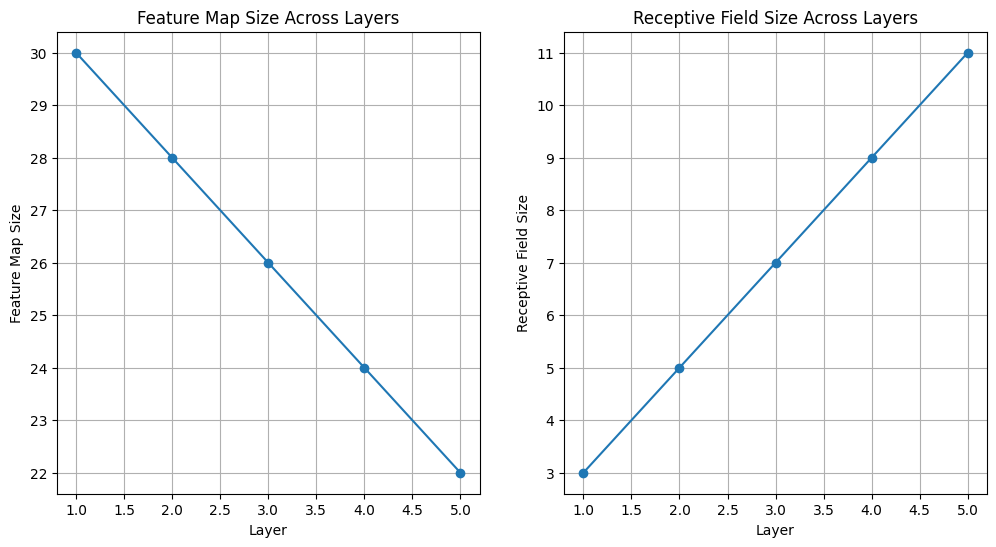

In [27]:

# 시각화
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 특징 맵 크기 시각화
ax[0].plot(range(1, len(feature_map_sizes) + 1), feature_map_sizes, marker='o')
ax[0].set_title("Feature Map Size Across Layers")
ax[0].set_xlabel("Layer")
ax[0].set_ylabel("Feature Map Size")
ax[0].grid(True)

# 수용 영역 크기 시각화
ax[1].plot(range(1, len(filter_sizes) + 1), [calculate_receptive_field(filter_sizes[:i+1], strides[:i+1]) for i in range(len(filter_sizes))], marker='o')
ax[1].set_title("Receptive Field Size Across Layers")
ax[1].set_xlabel("Layer")
ax[1].set_ylabel("Receptive Field Size")
ax[1].grid(True)

plt.show()
